In [11]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import deepchem as dc
import transformers
os.environ["KERAS_BACKEND"] = "tensorflow"


In [12]:
# %pip install cv2
# !pip show cv2
DATA_PATH = 'CompiledDataset/relevant_data.csv'
SMILES_PATH = 'CompiledDataset/data.csv'

import sys
from scipy import spatial
!{sys.executable} -m pip install opencv-python
import cv2
import pandas as pd
# from Model import GetData, DATA_PATH

#Retrieve dataframe from stored csv file
def GetData(file):
    """
    Retrieve data from file, return pandas dataframe
    """
    d = pd.read_csv(file)
    Data = d['Images']
    Data = pd.concat([Data, d[[str(i) for i in range(128)]]], axis="columns")
    Data['SMILES'] = pd.read_csv(SMILES_PATH)['SMILES']
    return Data

def _getEmbedding(index, df):
    """
    Return an embedding from dataframe (consisting of only the embeddings)
    """
    return df.iloc[index].to_numpy()

def _get_closest_embedding(vector, embeds):
    #euclidean = lambda x, y: 
    #distances = {embed:spatial.distance.cosine(vector, embed) for embed in embeds}
    #sorted_dists = sorted(distances.items(), key=lambda x:x[1])
    distances = [(embed, spatial.distance.cosine(vector, embed)) for embed in embeds]
    sorted_dists = sorted(distances, key=lambda x:x[1])
    return sorted_dists[0]


/opt/homebrew/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [13]:
data = GetData(DATA_PATH)

In [14]:
data

,Images,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,SMILES
0,ImageData/uh0.png,0.008918,0.007185,0.003843,-0.004025,-0.007159,-0.004339,-0.002224,0.004571,-0.006694,...,-0.005933,0.002324,-0.000274,0.001278,0.006330,-0.000406,0.005050,0.003521,0.005719,C[NH+](CC1=C(C=CC=C1Cl)F)CN2C(=O)CC3(C2=O)CCCCC3
1,ImageData/uh1.png,0.005314,0.007546,-0.005600,0.001770,0.004105,-0.003233,0.001038,0.001464,-0.009206,...,0.001146,0.002944,0.003084,0.001922,0.002732,-0.005300,-0.003507,0.004510,0.000134,CC1=C(C=C(C=C1)C(=O)NC2=C(C=C(C=C2)I)C3=NC4=CC...
2,ImageData/uh2.png,0.010540,-0.001101,-0.010949,0.010823,0.006059,-0.007081,0.004326,-0.004051,-0.007896,...,0.001325,-0.007659,-0.009448,-0.005587,-0.004743,0.007540,-0.004380,-0.006842,0.008730,COC1=CC=C(C=C1)CCN2C(=O)CC(SC2=NC3=CC=C(C=C3)O...
3,ImageData/uh3.png,0.009642,-0.005712,-0.007004,-0.001866,-0.005760,-0.001075,0.004211,-0.006042,-0.010296,...,-0.005524,-0.001443,-0.003787,-0.007360,-0.007552,0.001964,0.002989,-0.001459,0.000290,CCOC1=C(C=CC(=C1)/C=C(\C#N)/C2=CC=C(C=C2)[N+](...
4,ImageData/uh4.png,0.008436,-0.005728,-0.009615,0.002174,0.001339,-0.000722,0.004063,-0.005061,0.002492,...,-0.003132,-0.005669,-0.006349,-0.004257,0.006115,0.006779,-0.000608,-0.003798,-0.004487,CC1=C(C(=O)N(N1C)C2=CC=CC=C2)CN(CCN3CCCC3)C(=O...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,ImageData/uh1245.png,0.005178,0.000309,0.000833,0.002428,0.007894,0.000818,0.000616,0.004995,-0.004694,...,-0.010144,-0.001874,0.002277,0.007178,-0.009206,0.008637,0.000162,-0.005269,-0.002090,C1=CC=C(C(=C1)NC(=O)C2=C(C(=CC(=C2)Cl)[N+](=O)...
1246,ImageData/uh1246.png,-0.001969,-0.006363,-0.001005,0.004978,0.002395,-0.002361,-0.002082,-0.001974,0.000024,...,-0.005810,0.005080,-0.008886,-0.002668,-0.007688,-0.002359,0.005512,0.003034,0.001387,CC1=CC2=C(C=C1O)C(=C(N2CC3=CC(=CC=C3)Cl)C)C(=O)N
1247,ImageData/uh1247.png,0.003921,-0.005750,-0.001652,0.009373,-0.005731,-0.003018,0.004601,0.007990,0.004922,...,0.003553,0.000097,0.001365,0.000523,0.002336,0.004126,0.007616,0.008276,0.002631,C[C@H]1C(=O)NC2=C(O1)C=CC(=C2)C(=O)[C@@H](C)Cl
1248,ImageData/uh1248.png,0.000305,-0.004366,0.002527,0.004344,0.008283,0.002675,-0.004097,-0.004064,-0.006380,...,0.003972,-0.002594,-0.007957,-0.001054,-0.010196,0.006981,0.010379,0.006236,0.005025,C1C2=C(C=C(C=C2)NC(=O)NC3=CC=CC=C3Br)NS1(=O)=O


In [15]:
# import tensorflow as tf

# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)

# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)

In [16]:
#Split training and test data
# keras.preprocessing.image.load_img()
TrainX = np.asarray([keras.utils.img_to_array(keras.preprocessing.image.load_img(path=data['Images'][i], color_mode='grayscale').resize((150, 150))) for i in range(0, 1000)], dtype=np.float16)
TrainY = np.array([_getEmbedding(i, data.drop(['Images', 'SMILES'], axis=1)) for i in range(0, 1000)])#, dtype=np.float16)

TestX = np.asarray([keras.utils.img_to_array(keras.preprocessing.image.load_img(path=data['Images'][i], color_mode='grayscale').resize((150, 150))) for i in range(1000, 1249)], dtype=np.float16)
TestY = np.asarray([_getEmbedding(i, data.drop(['Images', 'SMILES'], axis=1)) for i in range(1000, 1249)])#, dtype=np.float16)

AllEmbeddings = np.concatenate((TrainY, TestY))

In [18]:
TrainX.shape, TrainY.shape#, TrainY[0]

((1000, 150, 150, 1), (1000, 128))

In [17]:
TrainY[0]

array([ 8.9177275e-03,  7.1854717e-03,  3.8428665e-03, -4.0253940e-03,
       -7.1591362e-03, -4.3388084e-03, -2.2244342e-03,  4.5708410e-03,
       -6.6944393e-03, -7.9990910e-03, -4.2905040e-03,  1.1734873e-02,
       -6.5311664e-03,  1.9662790e-03,  6.8848200e-03,  6.0130400e-03,
        6.6165370e-04,  5.5164765e-03, -6.4791483e-03,  4.8608356e-03,
       -1.8425450e-04, -5.2225525e-03, -1.9734392e-03, -7.1963600e-03,
       -7.5456296e-04, -8.2247204e-04,  9.5439370e-03, -5.3567146e-03,
       -8.1392920e-03, -3.4479846e-04, -7.4726716e-03, -6.9147090e-03,
       -1.3519467e-03, -4.7649564e-03, -6.3540163e-03,  9.1820860e-04,
       -1.7171575e-03,  3.8439300e-03,  5.0288877e-03, -7.0183566e-03,
       -6.3349665e-03, -9.6803333e-04, -3.5540640e-03,  3.4882694e-03,
        7.1226470e-03,  4.0810510e-03, -5.2643553e-03, -7.9339750e-04,
        4.9102370e-04, -7.8875620e-03,  1.0330998e-02,  7.8057590e-03,
        3.1532740e-03,  1.5166359e-03,  5.3257262e-03,  7.5360010e-03,
      

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 147968)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    18,940,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,032,704 (72.60 MB)

 Trainable params: 19,032,704 (72.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - accuracy: 0.0080 - loss: 18680.6328 - val_accuracy: 0.0000e+00 - val_loss: 4.1633e-05
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - accuracy: 0.0000e+00 - loss: 4.1331e-05 - val_accuracy: 0.0000e+00 - val_loss: 4.1348e-05
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 6.5932e-04 - loss: 4.0958e-05 - val_accuracy: 0.0201 - val_loss: 4.0305e-05


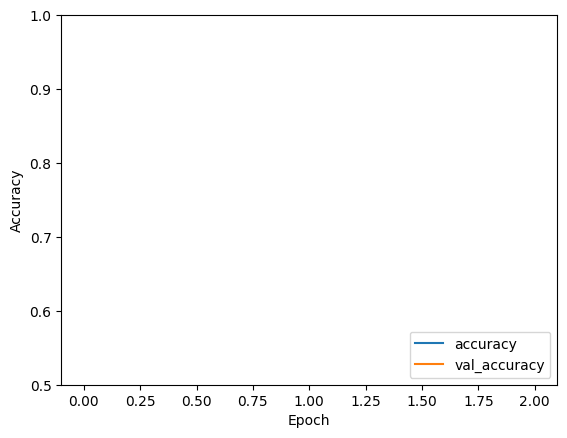

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128))

model.summary()

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

'''training model USING GENERATOR 
history = model.fit(generator(Data['Images'], Data.drop(['Images'], axis=1), 32),
 validation_data = (TestX, TestY), steps_per_epoch = 1000 // 32,
 epochs = 10)


#Train model
history = model.fit(TrainX, TrainY,
 validation_data = (TestX, TestY), 
 epochs = 10)
'''
history = model.fit(TrainX, TrainY,
 validation_data = (TestX, TestY), 
 epochs = 3)

# Running samples
#sample_chemical_embed = AllEmbeddings[50]
sample_chemical_diagram = TrainX[50]
#model_prediction = model.predict([sample_chemical_diagram])
model_prediction = model(np.reshape(sample_chemical_diagram, (1, 150, 150)))
closest_embed = _get_closest_embedding(vector=model_prediction[0], embeds=AllEmbeddings)[0]

# TODO retrieve corresponding iupac, compare w/ actual iupac
 
#def loadAndTrainLSTM()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [39]:
history.history['accuracy']
!pip show keras

/opt/homebrew/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Name: keras
Version: 3.3.2
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /opt/homebrew/lib/python3.11/site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: tensorflow-macos


In [ ]:
"""Vectorization"""

# vectorize_layer = TextVectorization(
#         max_tokens=vocab_size,
#         output_mode="int",
#         standardize=custom_standardization,
#         output_sequence_length=max_seq,
#     )
#     vectorize_layer.adapt(texts)

In [ ]:
"""Functional model"""
# from keras.layers import MultiHeadAttention, Dense, BatchNormalization, Input, 
# timestep_dimension = self.num_exercises*self.num_exercise_features

# # Timestep layers
# input_timesteps = Input(shape=(self.num_steps, timestep_dimension))
# lstm_1 = LSTM(units=125, activation="tanh", return_sequences=False)(input_timesteps)
# batch_norm_1 = BatchNormalization()(lstm_1)
# dense_1 = Dense(units=timestep_dimension/2)(batch_norm_1)

# embeds = np.array(self.embeddings)
# downsampled_embeds = np.array(Dense(units=timestep_dimension/2)(embeds))
# def concate_in_embeddings(downsampled_timesteps):
#     batch_size = K.shape(downsampled_timesteps)[0]
#     tiled_embeddings = K.tile(np.array([downsampled_embeds]), (batch_size, 1, 1))
#     return tiled_embeddings
    
# embeddings_processed = Lambda(concate_in_embeddings)(dense_1)
# downsampled_embeddings = embeddings_processed # Consider adding more layers in between


# mat_multed_timesteps = embeddings_multiplier([downsampled_embeddings, dense_1])
# batch_norm_2 = BatchNormalization()(mat_multed_timesteps)
# post_mat_layer_1 = Dense(units=timestep_dimension*2)(batch_norm_2)

# # Probability layer
# prob_layer = tfp.layers.DistributionLambda(
#     lambda t: tfd.Normal(loc=t[..., :timestep_dimension], 
#                         scale=0.01*tf.math.softplus(t[..., timestep_dimension:])))(post_mat_layer_1)#(tf.Variable(post_mat_layer_1))
# output = prob_layer # maybe add more layers

# model = Model(inputs=input_timesteps, outputs=output)
# #model.compile(optimizer="RMSprop", loss="mse", metrics=None)
# model.compile(optimizer="RMSprop", loss=neg_log_lik)

# self.model = model


In [47]:
tf.keras.preprocessing.text.Tokenizer()
# print(data)
smiles = data['SMILES']

                    Images         0         1         2         3         4  \
0        ImageData/uh0.png  0.008918  0.007185  0.003843 -0.004025 -0.007159   
1        ImageData/uh1.png  0.005314  0.007546 -0.005600  0.001770  0.004105   
2        ImageData/uh2.png  0.010540 -0.001101 -0.010949  0.010823  0.006059   
3        ImageData/uh3.png  0.009642 -0.005712 -0.007004 -0.001866 -0.005760   
4        ImageData/uh4.png  0.008436 -0.005728 -0.009615  0.002174  0.001339   
...                    ...       ...       ...       ...       ...       ...   
1245  ImageData/uh1245.png  0.005178  0.000309  0.000833  0.002428  0.007894   
1246  ImageData/uh1246.png -0.001969 -0.006363 -0.001005  0.004978  0.002395   
1247  ImageData/uh1247.png  0.003921 -0.005750 -0.001652  0.009373 -0.005731   
1248  ImageData/uh1248.png  0.000305 -0.004366  0.002527  0.004344  0.008283   
1249  ImageData/uh1249.png  0.010026 -0.003508  0.001906  0.006031  0.001980   

             5         6         7     

In [4]:
# !pip install --pre deepchem
# import deepchem
# deepchem.molnet.TransformerGenerator.create_transformer
# import deepchem as dc
# # deepchem.trans.Transformer.
# import transformers
smiles_tokenizer = dc.feat.SmilesTokenizer('vocab.txt')#deepchem/feat/tests/data/vocab.txt')

In [8]:
smiles_tokenizer('====')['input_ids']

[12, 22, 22, 22, 22, 13]

In [25]:
list(tf.data.Dataset.from_tensor_slices((TrainX, TrainY)))[0][0].shape, \
list(tf.data.Dataset.from_tensor_slices((TrainX, TrainY)))[0][1].shape,

(TensorShape([150, 150, 1]), TensorShape([128]))

In [47]:
emb_ds=tf.data.Dataset.from_tensor_slices((TrainX, TrainY)).padded_batch(batch_size=64)

In [49]:
history = model.fit(emb_ds, validation_data = (TestX, TestY), epochs=20)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 527ms/step - accuracy: 0.0171 - loss: 4.0014e-05 - val_accuracy: 0.0201 - val_loss: 3.9936e-05
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 509ms/step - accuracy: 0.0171 - loss: 3.9964e-05 - val_accuracy: 0.0201 - val_loss: 3.9885e-05
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 502ms/step - accuracy: 0.0171 - loss: 3.9914e-05 - val_accuracy: 0.0201 - val_loss: 3.9834e-05
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 503ms/step - accuracy: 0.0171 - loss: 3.9863e-05 - val_accuracy: 0.0201 - val_loss: 3.9782e-05
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 512ms/step - accuracy: 0.0171 - loss: 3.9811e-05 - val_accuracy: 0.0201 - val_loss: 3.9730e-05
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 516ms/step - accuracy: 0.0171 - loss: 3.9759e-05 - val_accuracy: 0.0201 - val_loss: 3.9677e-05
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 514ms/step - accuracy: 0.0171 - loss: 3.9706e-05 - val_accuracy: 0.0201 - val_loss: 3.9624e-05
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 536ms/s

In [35]:
# smiles_tokenizer.vocab_size

591

In [45]:
one_hot_layer = tf.keras.layers.Lambda(lambda x: tf.one_hot(x, smiles_tokenizer.vocab_size))
# one_hot_layer(np.array([[34, 66]], dtype=np.int32))

tf.one_hot(np.array([0, 34, 66]), smiles_tokenizer.vocab_size)

<tf.Tensor: shape=(3, 591), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [51]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape, concatenate, Input, Lambda, Flatten, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
class TfProbabilityModel:
    pass
class ProbabilityEmbeddingsModel(TfProbabilityModel):
    def __init__(self, num_exercises=700, n_steps=10, n_features_per_ex=2, n_lstm_units=125, dropout_enabled=True, hyper_params=None, pre_trained_model=None, dir=None, metadata=None, embeds=None):
        self.embeddings_model = sentence_embedding()

        #if not (isinstance(embeds, np.ndarray) and not isinstance(embeds, list)) or embeds == None or len(embeds) == 0:
        #    print("WARNING: No Embeddings Found; Model will not compile. Recompile model with embeddings sent")
        #    return

        if metadata != None:
            # Load from metadata
            self.model_metadata = metadata
            self.num_exercises = metadata['num_exercises']
            self.num_steps = metadata['num_steps']
            self.num_exercise_features = metadata['num_exercise_features']
            self.dropout_enabled = metadata['dropout_enabled']
            self.num_lstm_units = metadata['num_lstm_units']
            self.hyper_parameters = metadata['hyper_parameters']
            self.custom_objects = None
            self.embeddings = metadata['embeddings']
            if dir != None:
                self.model = load_model(dir)
                return
                
        if embeds is None:
            print("WARNING: No Embeddings Found; Model will not compile. Recompile model with embeddings sent")
            return
        # Initialize/get embeddings
        self.embeddings = embeds

        super().__init__(num_exercises, n_steps, n_features_per_ex, n_lstm_units, dropout_enabled, hyper_params, pre_trained_model)
        self.set_model_metadata(model_type='ProbabilityEmbeddingsModel')

    def set_model_metadata(self, model_type):
        self.model_metadata['embeddings'] = self.embeddings.tolist()
        super().set_model_metadata(model_type)

    def _compile(self):
        #if self.embeddings == None or len(self.embeddings) == 0:
        #    print("WARNING: No Embeddings Found; Model will not compile. Recompile model with embeddings sent")
        #    return

        timestep_dimension = self.num_exercises*self.num_exercise_features

        # Timestep layers
        input_timesteps = Input(shape=(self.num_steps, timestep_dimension))
        lstm_1 = LSTM(units=125, activation="tanh", return_sequences=False)(input_timesteps)
        batch_norm_1 = BatchNormalization()(lstm_1)
        dense_1 = Dense(units=timestep_dimension/2)(batch_norm_1)

        embeds = np.array(self.embeddings)
        downsampled_embeds = np.array(Dense(units=timestep_dimension/2)(embeds))
        def concate_in_embeddings(downsampled_timesteps):
            batch_size = K.shape(downsampled_timesteps)[0]
            tiled_embeddings = K.tile(np.array([downsampled_embeds]), (batch_size, 1, 1))
            return tiled_embeddings
            
        embeddings_processed = Lambda(concate_in_embeddings)(dense_1)
        downsampled_embeddings = embeddings_processed # Consider adding more layers in between

        class EmbeddingsMatMultLayer(keras.layers.Layer):
            def __init__(self):
                super().__init__()
                
            def call(self, inputs):
                x, y = inputs
                return K.batch_dot(x, y)
            
        embeddings_multiplier = EmbeddingsMatMultLayer()
        mat_multed_timesteps = embeddings_multiplier([downsampled_embeddings, dense_1])
        batch_norm_2 = BatchNormalization()(mat_multed_timesteps)
        post_mat_layer_1 = Dense(units=timestep_dimension*2)(batch_norm_2)

        # Probability layer
        prob_layer = tfp.layers.DistributionLambda(
            lambda t: tfd.Normal(loc=t[..., :timestep_dimension], 
                                scale=0.01*tf.math.softplus(t[..., timestep_dimension:])))(post_mat_layer_1)#(tf.Variable(post_mat_layer_1))
        output = prob_layer # maybe add more layers

        model = Model(inputs=input_timesteps, outputs=output)
        #model.compile(optimizer="RMSprop", loss="mse", metrics=None)
        model.compile(optimizer="RMSprop", loss=neg_log_lik)

        self.model = model
    
    def train(self, x, y, epochs=50, batch_size=32, use_cache=True): # TODO
        return super().train(x, y, epochs, batch_size, use_cache)

In [54]:
# model.save('encoder.keras')